In [0]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving data-house-pricing-train.csv to data-house-pricing-train.csv


In [0]:
# %matplotlib inline
import numpy
import pandas            as pd
import matplotlib.pyplot as plt
import tensorflow        as tf
from   tensorflow.keras          import layers
from   sklearn.preprocessing     import LabelEncoder, OneHotEncoder
from   sklearn.model_selection   import train_test_split
from   sklearn.feature_selection import SelectKBest
from   sklearn.feature_selection import chi2
from   sklearn.ensemble          import ExtraTreesClassifier

In [179]:
print("Versions:")
print("Tensorflow:", tf.VERSION)
# 1.14.0-rc1
print("Keras: ", tf.keras.__version__)
#2.2.4-tf

Versions:
Tensorflow: 1.14.0
Keras:  2.2.4-tf


In [0]:
# Load house-pricing dataset
path = "./data-house-pricing-train.csv"
dataset = pd.read_csv(path)

In [0]:
# Function replace object typed columns with int64 typed columns by one hot encoding method
def one_hot_encoding(dataset, column_index, row_length):
  y = dataset.iloc[:, column_index].values
  le = LabelEncoder()
  y = le.fit_transform(y)
  y = pd.Series(y.reshape(row_length,))
  return y

In [0]:
# Collect categorical values to make binary variables
categorical_columns = []
for i in dataset.columns.values:
    if(dataset[i].dtype == 'object'):
        categorical_columns.append(i)

In [0]:
#Handling NaN values and one hot encoding all object typed columns
row_length = len(dataset)

for j, feature in enumerate(features):
    if (dataset[feature].dtype == 'int64' or dataset[feature].dtype == 'float64'):
        dataset[feature].fillna(dataset[feature].mean(), inplace = True)
        
for i, feature in enumerate(features):
    if (dataset[feature].dtype == 'object'):
        dataset[feature].fillna("NA", inplace = True)
        dataset[feature] = one_hot_encoding(dataset, i, row_length)


In [184]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,...,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,...,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,...,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,...,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,...,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000


(1460, 81)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


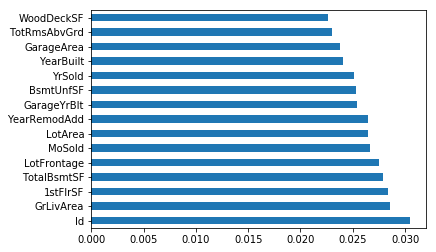

In [185]:
# Feature selection no.1 (feature importance)
#del dataset['Id']
print(dataset.shape)

X = dataset.iloc[:,0:79]  #independent columns
y = dataset.iloc[:,-1]    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()


In [186]:
# Feature selection no.2 (univariate selection)
X = dataset.iloc[:,0:79]  #independent columns
y = dataset.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs         Score
4        LotArea  1.011497e+07
75       MiscVal  6.253332e+06
44      2ndFlrSF  4.648841e+05
34    BsmtFinSF1  3.999851e+05
71      PoolArea  3.835642e+05
36    BsmtFinSF2  3.688827e+05
26    MasVnrArea  2.857403e+05
37     BsmtUnfSF  2.747512e+05
45  LowQualFinSF  2.448810e+05
46     GrLivArea  1.968501e+05


In [0]:
# Generate dummy variables and remove unnecessary columns
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

X = pd.DataFrame.copy(dataset)

for column in categorical_columns:
    X = generate_dummies(X, column)
    
for column in categorical_columns:
    del X[column]

In [189]:
X.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning_0', 'MSZoning_1',
       'MSZoning_2', 'MSZoning_3', 'MSZoning_4', 'Street_0', 'Street_1',
       'Alley_0', 'Alley_1', 'Alley_2', 'LotShape_0', 'LotShape_1',
       'LotShape_2', 'LotShape_3', 'LandContour_0', 'LandContour_1',
       'LandContour_2', 'LandContour_3', 'Utilities_0', 'Utilities_1',
       'LotConfig_0', 'LotConfig_1', 'LotConfig_2', 'LotConfig_3',
       'LotConfig_4', 'LandSlope_0', 'Land